<a href="https://colab.research.google.com/github/Blake2912/Vahini-Phase-1/blob/phase-2-path-finding/OurPath_Vahini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install osmnx networkx shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import osmnx as ox
import networkx as nx
from shapely.geometry import Polygon

In [49]:
## Using boundbox

north, south, east, west = 12.96768338736144,12.965518842636625,77.71393642911939,77.71046157295785
# cmrit lat long bounds 0
# north (float) – northern latitude of bounding box: 12.96768338736144
# south (float) – southern latitude of bounding box: 12.965518842636625
# east (float) – eastern longitude of bounding box: 77.71393642911939
# west (float) – western longitude of bounding box: 77.71046157295785
network_type = 'all_private' # "all_private", "all", "bike", "drive", "drive_service", "walk"

G = ox.graph_from_bbox(
      north, south, east, west, 
      network_type=network_type, 
      simplify=True, 
      retain_all=False, 
      truncate_by_edge=False, 
      clean_periphery=True, 
      custom_filter=None)
# Create a graph from OSM within some bounding box.
def plot():
  # Plot a graph.
  fig, ax = ox.plot_graph(G)

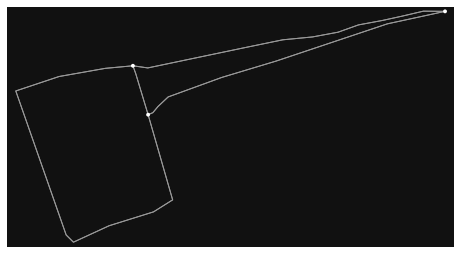

In [50]:
plot()

In [51]:
#added

In [52]:
# adding node basic_science and connecting it to the existing graph (from openstreet)

G.add_node('basic_science',y= 12.96626, x=77.71211,street_count = 3) # we can add nodes like this..
G.add_edge(4159727902,'basic_science',length=0)

0

In [53]:
# nodes
mapping = {3798918923:'cmrit_entrance',4159727902:'teacher_parking',4159727907:'volley_ball_court' }
G = nx.relabel_nodes(G, mapping)
[G.nodes[x] for x in G]

[{'y': 12.967455, 'x': 77.7139021, 'street_count': 3},
 {'y': 12.9667974, 'x': 77.711963, 'street_count': 3},
 {'y': 12.9671086, 'x': 77.7118638, 'street_count': 3},
 {'y': 12.96626, 'x': 77.71211, 'street_count': 3}]

In [54]:
G.nodes 
# basic_science is ur new node, u can see that the 
# line between basic_science node  and the teachers-parking TURN node is darker 
# meaning -> addition of edge

NodeView(('cmrit_entrance', 'teacher_parking', 'volley_ball_court', 'basic_science'))

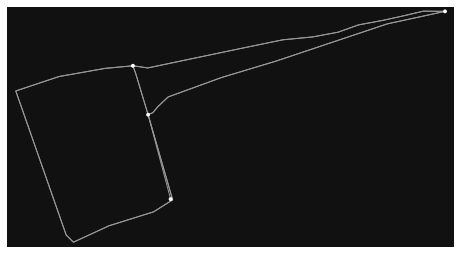

In [55]:

plot()

In [60]:
# finding shortest route
# start_latlng = (12.9671086,77.7118638)
# end_latlng = (12.966229089103756, 77.7121607793537)

# start_latlng = G['cmrit_entrance']
# end_latlng = G['basic_science']
optimizer = 'length'
# orig_node = ox.distance.nearest_nodes(G, start_latlng[1], start_latlng[0])
# find the nearest node to the end location
# dest_node = ox.distance.nearest_nodes(G, end_latlng[1], end_latlng[0])


orig_node = 'cmrit_entrance'
dest_node = 'volley_ball_court'

#  find the shortest path
shortest_route = nx.shortest_path(G, orig_node, dest_node, weight=optimizer)

# print(shortest_route)
shortest_route_map = ox.plot_route_folium(G, shortest_route)
shortest_route_map

# # This saves it on html file to view it easily
# shortest_route_map.save('route.html')

In [61]:
[x for x in shortest_route] #printing of lat/long of the nodes in shortest_route

['cmrit_entrance', 'volley_ball_court']

In [36]:
G.edges(data=True)

OutMultiEdgeDataView([(3798918923, 4159727902, {'osmid': 414835003, 'highway': 'pedestrian', 'oneway': False, 'reversed': True, 'length': 224.51000000000002, 'geometry': <shapely.geometry.linestring.LineString object at 0x7ff07c32cc40>}), (3798918923, 4159727907, {'osmid': 661967560, 'highway': 'residential', 'oneway': False, 'reversed': True, 'length': 225.35899999999998, 'geometry': <shapely.geometry.linestring.LineString object at 0x7ff07c32cd60>}), (4159727902, 4159727907, {'osmid': [414835002, 640540678], 'highway': 'pedestrian', 'oneway': False, 'reversed': False, 'length': 339.8109999999999, 'geometry': <shapely.geometry.linestring.LineString object at 0x7ff07ca5ea00>}), (4159727902, 4159727907, {'osmid': 414835002, 'highway': 'pedestrian', 'oneway': False, 'reversed': True, 'length': 36.241, 'geometry': <shapely.geometry.linestring.LineString object at 0x7ff07ca5e640>}), (4159727902, 3798918923, {'osmid': 414835003, 'highway': 'pedestrian', 'oneway': False, 'reversed': False, '